# 06 Graph 1 Spitalbetten nach Kanton

Das Skript hier berechnet die Anzahl Spitalbetten nach Kanton und Einwohner. Datengrundlage sind die Kennzahlen der Schweizer Spitäler von 2011, vor der Einführung der neuen Spitalfinanzierung und 2017, wovon die neusten Daten sind. Quelle: https://www.bag.admin.ch/bag/de/home/zahlen-und-statistiken/zahlen-fakten-zu-spitaelern/kennzahlen-der-schweizer-spitaeler.html
Die Zahlen zu den Einwohnerinnen pro Kanton und der Schweiz total stammen von https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/kantone/bern.html.

Was hier konkret passiert:
* Kennzahlen zu 2011 und 2017 je in einem DF laden
* neue Datenframes mit den Summen der Betten nach Kanton erstellen
* Summe der Spitalbetten aller Kantone appenden


* manuellen Dataframe mit den Einwohnerzahlen erstellen
* alle Dataframes mergen
* die Dichte der Betten pro Kanton für 2011 und 2017 berechnen
* das Ergebnis plotten


In [1]:
#import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
# Kennzahlen Spitäler 2017 laden
xls = pd.ExcelFile('Recherche/Kennzahlen_Spitäler 2017.xlsx')
df_2017 = pd.read_excel(xls, 'KZ2017_KZP17')
#df_2017.head(2)

In [3]:
# Kennzahlen Spitäler 2011 laden
xls = pd.ExcelFile('Recherche/Kennzahlen_Spitäler 2011.xlsx')
df_2011 = pd.read_excel(xls, 'Kennzahlen 2011')

#df_2011.head(2)

In [4]:
# Genaue Schreibweise von BettenStatA finden, welche gemäss der Beschreibung zu den Kennzahlen die 
# Anzahl stationären Betten in der Akutsomatik angeben

#print(df_2017.columns.to_list())

In [5]:
# 2017: Summe der Betten der Akutspitäler pro Kanton berechnen

betten_2017=df_2017[(df_2017['KT']=='BE') | (df_2017['KT']=='FR') | (df_2017['KT']=='SO')].groupby('KT')['BettenStatA'].sum().round(1).reset_index()
betten_2017.columns= ['KT', 'Betten 17']
betten_2017

,KT,Betten 17
0,BE,3043.5
1,FR,521.0
2,SO,512.1


In [6]:
# 2017: Die Summe der Betten in allen Kantonen appenden:

betten_2017 = betten_2017.append({'KT': 'CH', 'Betten 17': df_2017['BettenStatA'].sum().round(1)}, ignore_index=True)
betten_2017


,KT,Betten 17
0,BE,3043.5
1,FR,521.0
2,SO,512.1
3,CH,46478.6


In [7]:
# 2011: Summe der Betten der Akutspitäler pro Kanton berechnen

betten_2011=df_2011[(df_2011['KT']=='BE') | (df_2011['KT']=='FR') | (df_2011['KT']=='SO')].groupby('KT')['BettenStatA'].sum().reset_index()
betten_2011.columns= ['KT', 'Betten 11']
betten_2011

,KT,Betten 11
0,BE,3201.2
1,FR,652.0
2,SO,449.9


In [8]:
# 2011 Die Summe der Betten in allen Kantonen appenden:

betten_2011 = betten_2011.append({'KT': 'CH', 'Betten 11': df_2011['BettenStatA'].sum().round(1)}, ignore_index=True)
betten_2011


,KT,Betten 11
0,BE,3201.2
1,FR,652.0
2,SO,449.9
3,CH,23938.5


In [9]:
#DF Mit den Einwohnerzahlen der Kantone abgleichen 
einwohner_roh_2017 = {'KT': ['BE','FR','SO','CH'], 'Einwohner 17':[1031126,315074,271432,8484130]}
einwohner_2017 = pd.DataFrame(einwohner_roh_2017)

einwohner_roh_2011 = {'KT': ['BE','FR','SO','CH'], 'Einwohner 11':[985046,284668,256990,7954662]}
einwohner_2011 = pd.DataFrame(einwohner_roh_2011)

einwohner_2017

,KT,Einwohner 17
0,BE,1031126
1,FR,315074
2,SO,271432
3,CH,8484130


In [10]:
# Dataframes mergen
betten_merge = betten_2017.merge(einwohner_2017, how='outer', left_on='KT', right_on='KT')
betten_merge = betten_merge.merge(betten_2011, how='outer', left_on='KT', right_on='KT')
betten_merge = betten_merge.merge(einwohner_2011, how='outer', left_on='KT', right_on='KT')

#Kantonsspalte umbenennen
betten_merge.columns = ['Kanton', 'Betten 17','Einwohner 17','Betten 11','Einwohner 11']
betten_merge

,Kanton,Betten 17,Einwohner 17,Betten 11,Einwohner 11
0,BE,3043.5,1031126,3201.2,985046
1,FR,521.0,315074,652.0,284668
2,SO,512.1,271432,449.9,256990
3,CH,46478.6,8484130,23938.5,7954662


In [11]:
# Betten pro 1000 Einwohnerinnen ausrechnen für 2011 und 2017
betten_merge['Anteil 17']=(betten_merge['Betten 17']/betten_merge['Einwohner 17']*1000).round(2)
betten_merge['Anteil 11']=(betten_merge['Betten 11']/betten_merge['Einwohner 11']*1000).round(2)
betten_merge = betten_merge[['Kanton', 'Betten 11','Einwohner 11','Anteil 11', 'Betten 17', 
                             'Einwohner 17', 'Anteil 17']]
betten_merge

,Kanton,Betten 11,Einwohner 11,Anteil 11,Betten 17,Einwohner 17,Anteil 17
0,BE,3201.2,985046,3.25,3043.5,1031126,2.95
1,FR,652.0,284668,2.29,521.0,315074,1.65
2,SO,449.9,256990,1.75,512.1,271432,1.89
3,CH,23938.5,7954662,3.01,46478.6,8484130,5.48


<function matplotlib.pyplot.show(*args, **kw)>

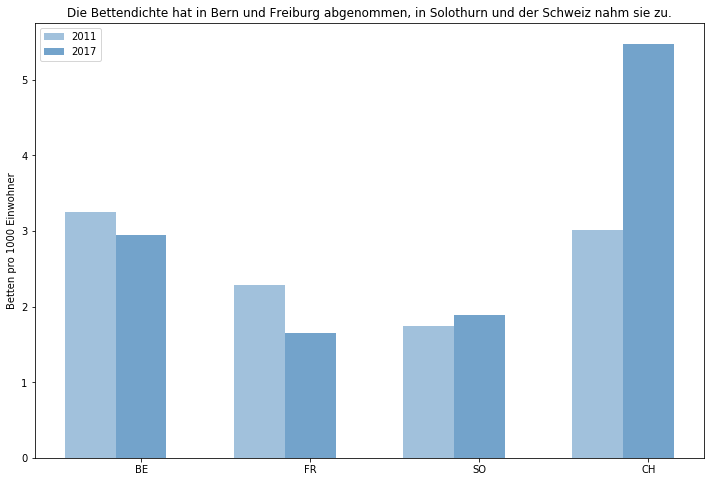

In [15]:
barWidth = 0.3
plt.figure(figsize=(12,8))

# height of the bars
bars_11 = betten_merge['Anteil 11']
bars_17 = betten_merge['Anteil 17']

#position
r_11 = np.arange(len(bars_11))
r_17 = [x + barWidth for x in r_11]

plt.bar(r_11, bars_11, width=barWidth, color = '#a1c1dc', label= '2011')
plt.bar(r_17, bars_17, width=barWidth, color = '#73a3cb', label= '2017')

plt.xticks([r +barWidth for r in range(len(bars_11))], ['BE', 'FR', 'SO', 'CH'])
plt.ylabel('Betten pro 1000 Einwohner')
plt.legend()
plt.title('Die Bettendichte hat in Bern und Freiburg abgenommen, in Solothurn und der Schweiz nahm sie zu.')

plt.show